In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def wrangle(filepath):
    df=pd.read_csv(filepath,names=["date","amount"],index_col="date")
    #scale data to actual hours
    df["amount"] = df["amount"] /1000
    #convert index to datetime
    df.index=pd.to_datetime(df.index)
    #limit data to relevant dates
    df=df[df.index >'2022-10-1']
    return df

# Report #1

## in the first report we analyse data starting from Ocrober 1st and December 22nd
### we are analysing this data on the day December 23rd,
### the purpose of this report is to use help of data proccesing and visualisation to assess the performance and progression of a students study time over the specified period, and come up with relevant conclusions, and stratigies on the way forward.

In [5]:
df=wrangle("Checkmarks.csv")

In [6]:
df.head(20)

,amount
date,
2022-12-22,2.00
2022-12-21,2.00
2022-12-20,2.65
2022-12-19,3.10
2022-12-18,2.50
2022-12-17,2.40
2022-12-16,1.50
2022-12-15,1.65
2022-12-14,2.65


# Analysis:


# 1.trend analysis

## 1.1.monthly timeseries plot average and sum 

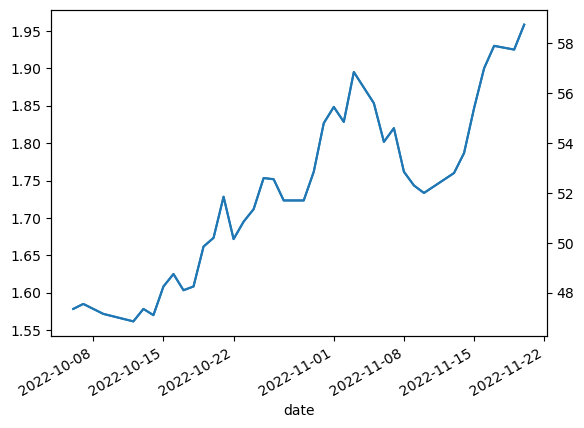

In [22]:
df["amount"].rolling(30).mean().plot()
# Create a second y-axis to show total monthly hours
y2 = plt.twinx()
#plot the summation of a 30 day window
y2.plot(df["amount"].rolling(30).sum());

## from the monthly plot we can see a clear, mostly consistent upward trend, which is a good sign, we should further investigate the data explore patterns and perhaps find a strategy to increase the slope of imporvement

## 1.2.weekly timeseries plot of average and sum 

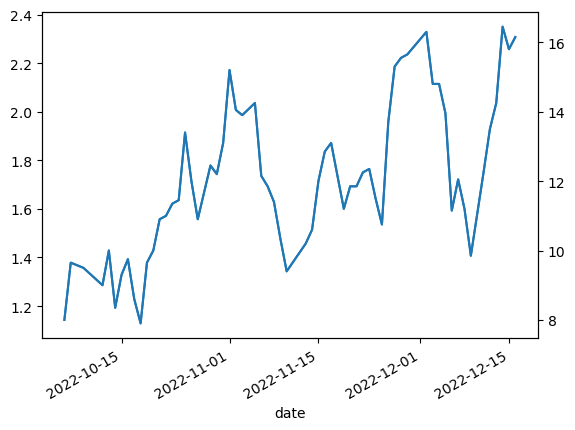

In [24]:
#plot 7 day rolling average
df["amount"].rolling(7).mean().plot()
# Create a second y-axis to show total weekly hours
y2 = plt.twinx()
#plot the summation of a 7 day window
y2.plot(df["amount"].rolling(7).sum());

## from the weekly plot, we can see strong week to week inconsistency,which shows itself in the form of significant ups and downs

## 1.3.daily timeseries plot

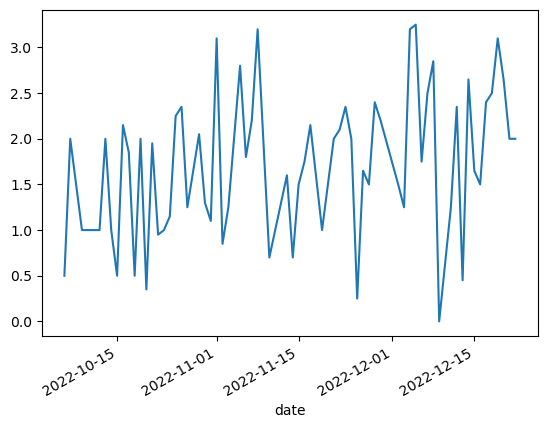

In [26]:
df["amount"].plot();

## from the daily plot, we see clear Oscillation in the data that we can conclude the that daily inconsistency is causing a significant obstacle in the way of improvement

# 2.Distribution analysis

## 2.1.Summary statistics

In [27]:
df.describe()

,amount
count,67.000000
mean,1.723881
std,0.790203
min,0.000000
25%,1.125000
50%,1.800000
75%,2.225000
max,3.250000


## 2.2.Histogram of Entire Dataset

<AxesSubplot:>

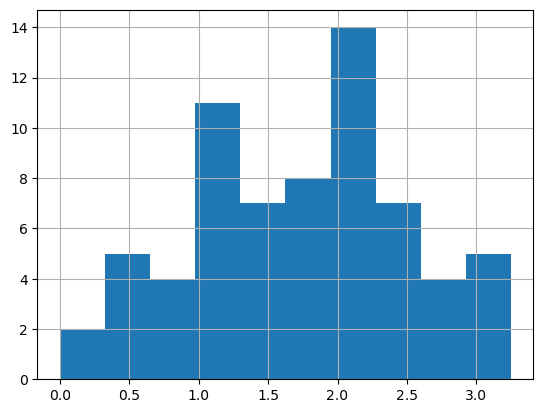

In [16]:
df["amount"].hist();

## we notice a wide spread in the distribution, a longer tail to the left side of the data, and seemingly bimodal distribution, we should check latest data for more relevant and precise analysis.

In [30]:
df.head(30).describe()

,amount
count,30.000000
mean,1.958333
std,0.803879
min,0.000000
25%,1.500000
50%,2.000000
75%,2.475000
max,3.250000


## 2.3 histogram of last 30 days of data

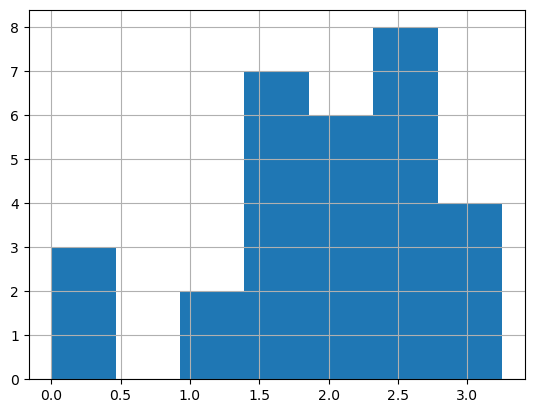

In [42]:
df["amount"].head(30).hist(bins=7);

<AxesSubplot:>

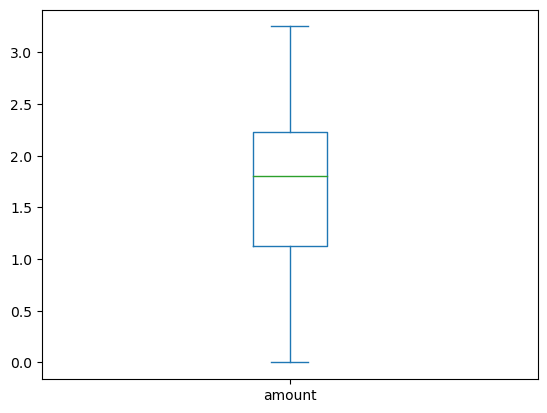

In [17]:
df["amount"].plot(kind="box")

<AxesSubplot:>

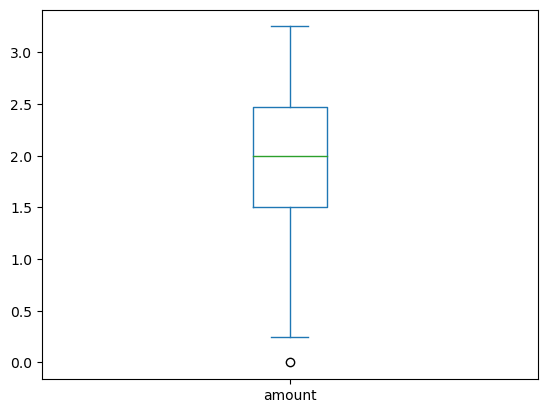

In [32]:
df["amount"].head(30).plot(kind="box")

## while it's clear that more consistency is present in the last 30 days, which shows itself in lower interquartile range coupled with a higher center, it would be highly advisable to eliminate the precense of tail to the left side of the population

# we conclude that a sound direction would be to set a minimal amount of daily study and minimize negative deviation

In [ ]:
fig,axs=plt.subplots(3,figsize=(15,20))

df["amount"].rolling(30).mean().plot(ax=axs[0])
# Create a second y-axis to show total monthly hours
y2 = axs[0].twinx()
#plot the summation of a 7 day window
y2.plot(df["amount"].rolling(30).sum())


#plot 7 day rolling average
df["amount"].rolling(7).mean().plot(ax=axs[1])
# Create a second y-axis to show total weekly hours
y2 = axs[1].twinx()
#plot the summation of a 7 day window
y2.plot(df["amount"].rolling(7).sum())

df["amount"].plot(ax=axs[2])


